In [4]:
def api_runner():

    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    global df
    # Original sandbox environment url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'PrivateKeyGoesHere',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    #for only keeping data in the panda dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.Timestamp.now()
    #df = df.append(df2)  ---deprecated append used in the video - concat used now
    #df = pd.concat([df, df2])

    import pandas as pd

    # This allows you to see all the columns and rows

    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    # This normalizes the data and converts it to a Pandas dataframe
    
    df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now') ---deprecated to_datetime used in the video - Timestamp.now used now
    df['timestamp'] = pd.Timestamp.now()
    df

    import os

    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header='column_names')
    else:
        df.to_csv(r'API.csv', mode='a', header=False)

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(180) #sleep for 3 minutes
exit()

In [1]:
import pandas as pd


In [17]:
df72 = pd.read_csv(r'API.csv')
df72.head(5)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9777,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19177981.00000,...,40.09240,397668885026.84998,NaN,2022-10-13T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 09:58:45.848430
1,1,1027,Ethereum,ETH,ethereum,6138,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122778483.49900,...,17.03640,154344231774.75000,NaN,2022-10-13T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 09:58:45.848430
2,2,825,Tether,USDT,tether,40768,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68421859091.16577,...,7.55230,70144972711.11000,NaN,2022-10-13T15:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-13 09:58:45.848430
3,3,3408,USD Coin,USDC,usd-coin,6493,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45796226299.35951,...,5.05590,45797652414.87000,NaN,2022-10-13T15:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-13 09:58:45.848430
4,4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,...,4.75060,53352416852.49000,NaN,2022-10-13T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 09:58:45.848430


In [18]:
#Gget rid of the scientific notation

pd.set_option('display.float', lambda x: '%.5f' % x)
df72.head(5)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9777,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19177981.00000,...,40.09240,397668885026.84998,NaN,2022-10-13T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 09:58:45.848430
1,1,1027,Ethereum,ETH,ethereum,6138,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122778483.49900,...,17.03640,154344231774.75000,NaN,2022-10-13T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 09:58:45.848430
2,2,825,Tether,USDT,tether,40768,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68421859091.16577,...,7.55230,70144972711.11000,NaN,2022-10-13T15:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-13 09:58:45.848430
3,3,3408,USD Coin,USDC,usd-coin,6493,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45796226299.35951,...,5.05590,45797652414.87000,NaN,2022-10-13T15:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-13 09:58:45.848430
4,4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,...,4.75060,53352416852.49000,NaN,2022-10-13T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 09:58:45.848430


In [19]:
# Now let's look at the coin trends over time

df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3.head(5)

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,2.80780,-0.86184,-5.44441,-9.00543,-22.63524,-8.80874
Ethereum,2.79537,-3.12209,-7.69906,-21.02374,-36.53904,2.85987
Tether,-0.00128,0.00281,-0.01255,-0.00677,-0.02463,0.03890
USD Coin,0.00039,0.00993,0.01540,0.01510,0.01012,0.01451
BNB,1.75818,-1.42529,-9.33394,-5.63876,-17.18866,12.25208


In [20]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      2.80780
           quote.USD.percent_change_24h    -0.86184
           quote.USD.percent_change_7d     -5.44441
           quote.USD.percent_change_30d    -9.00543
           quote.USD.percent_change_60d   -22.63524
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -2.70129
           quote.USD.percent_change_7d    -12.22843
           quote.USD.percent_change_30d   -18.61818
           quote.USD.percent_change_60d   -41.44985
           quote.USD.percent_change_90d    -8.37901
Length: 90, dtype: float64

In [21]:
df5 = df4.to_frame(name='values')
df5.head(8)

values
name                                           
Bitcoin  quote.USD.percent_change_1h    2.80780
         quote.USD.percent_change_24h  -0.86184
         quote.USD.percent_change_7d   -5.44441
         quote.USD.percent_change_30d  -9.00543
         quote.USD.percent_change_60d -22.63524
         quote.USD.percent_change_90d  -8.80874
Ethereum quote.USD.percent_change_1h    2.79537
         quote.USD.percent_change_24h  -3.12209

In [22]:
df5.count()


values    90
dtype: int64

In [23]:
# Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
# So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))

df6 = df5.reset_index()
df6.head(8)

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,2.80780
1,Bitcoin,quote.USD.percent_change_24h,-0.86184
2,Bitcoin,quote.USD.percent_change_7d,-5.44441
3,Bitcoin,quote.USD.percent_change_30d,-9.00543
4,Bitcoin,quote.USD.percent_change_60d,-22.63524
5,Bitcoin,quote.USD.percent_change_90d,-8.80874
6,Ethereum,quote.USD.percent_change_1h,2.79537
7,Ethereum,quote.USD.percent_change_24h,-3.12209


In [24]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head(8)

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,2.80780
1,Bitcoin,quote.USD.percent_change_24h,-0.86184
2,Bitcoin,quote.USD.percent_change_7d,-5.44441
3,Bitcoin,quote.USD.percent_change_30d,-9.00543
4,Bitcoin,quote.USD.percent_change_60d,-22.63524
5,Bitcoin,quote.USD.percent_change_90d,-8.80874
6,Ethereum,quote.USD.percent_change_1h,2.79537
7,Ethereum,quote.USD.percent_change_24h,-3.12209


In [25]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [26]:
df7.head(8)

,name,percent_change,values
0,Bitcoin,1h,2.80780
1,Bitcoin,24h,-0.86184
2,Bitcoin,7d,-5.44441
3,Bitcoin,30d,-9.00543
4,Bitcoin,60d,-22.63524
5,Bitcoin,90d,-8.80874
6,Ethereum,1h,2.79537
7,Ethereum,24h,-3.12209


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

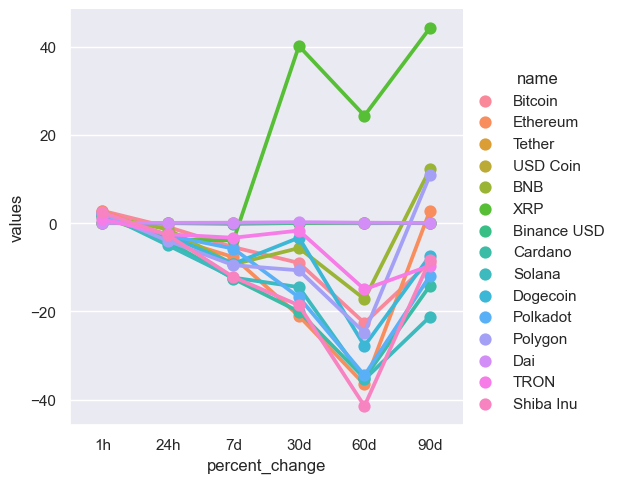

In [30]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()

In [41]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10


,name,quote.USD.price,timestamp
0,Bitcoin,18936.61357,2022-10-13 09:58:45.848430
15,Bitcoin,18942.22124,2022-10-13 10:01:46.334564
30,Bitcoin,18952.68969,2022-10-13 10:04:46.728128
45,Bitcoin,18990.97016,2022-10-13 10:07:47.051257
60,Bitcoin,18996.92372,2022-10-13 10:10:47.385261
75,Bitcoin,18982.03877,2022-10-13 10:13:47.708260


In [44]:
# convert to datetime
df10['timestamp'] = pd.to_datetime(df10['timestamp'])


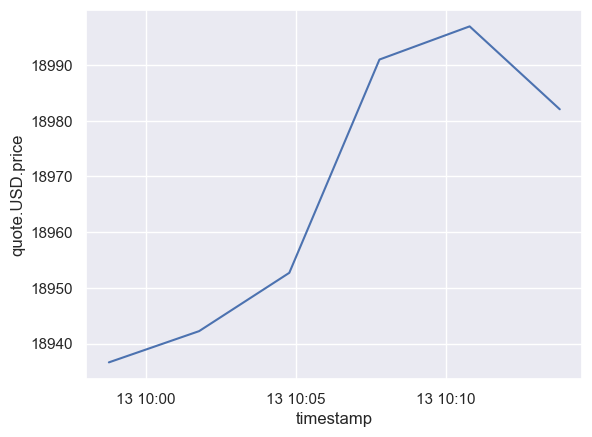

In [45]:
sns.set_theme(style='darkgrid')
sns.lineplot(data = df10, x='timestamp', y='quote.USD.price')
plt.show()